# Introduction
Clustering is a branch of unsupervised learning that groups data points based on an algorithm specific similarity metric.

K-means uses an algorithm that attempts to separate samples into n groups of equal variance.

Data source: https://archive.ics.uci.edu/dataset/236/seeds

# Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
df = pd.read_csv('data/seeds.csv')
df["Class"] = df["Class"].astype(int)
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
print(df.columns)

Index(['Area', 'Perimeter', 'Compactness', 'Length', 'Width',
       'Asymetry Coefficient', 'Length of Kernel Groove', 'Class'],
      dtype='object')


# Visualize the data

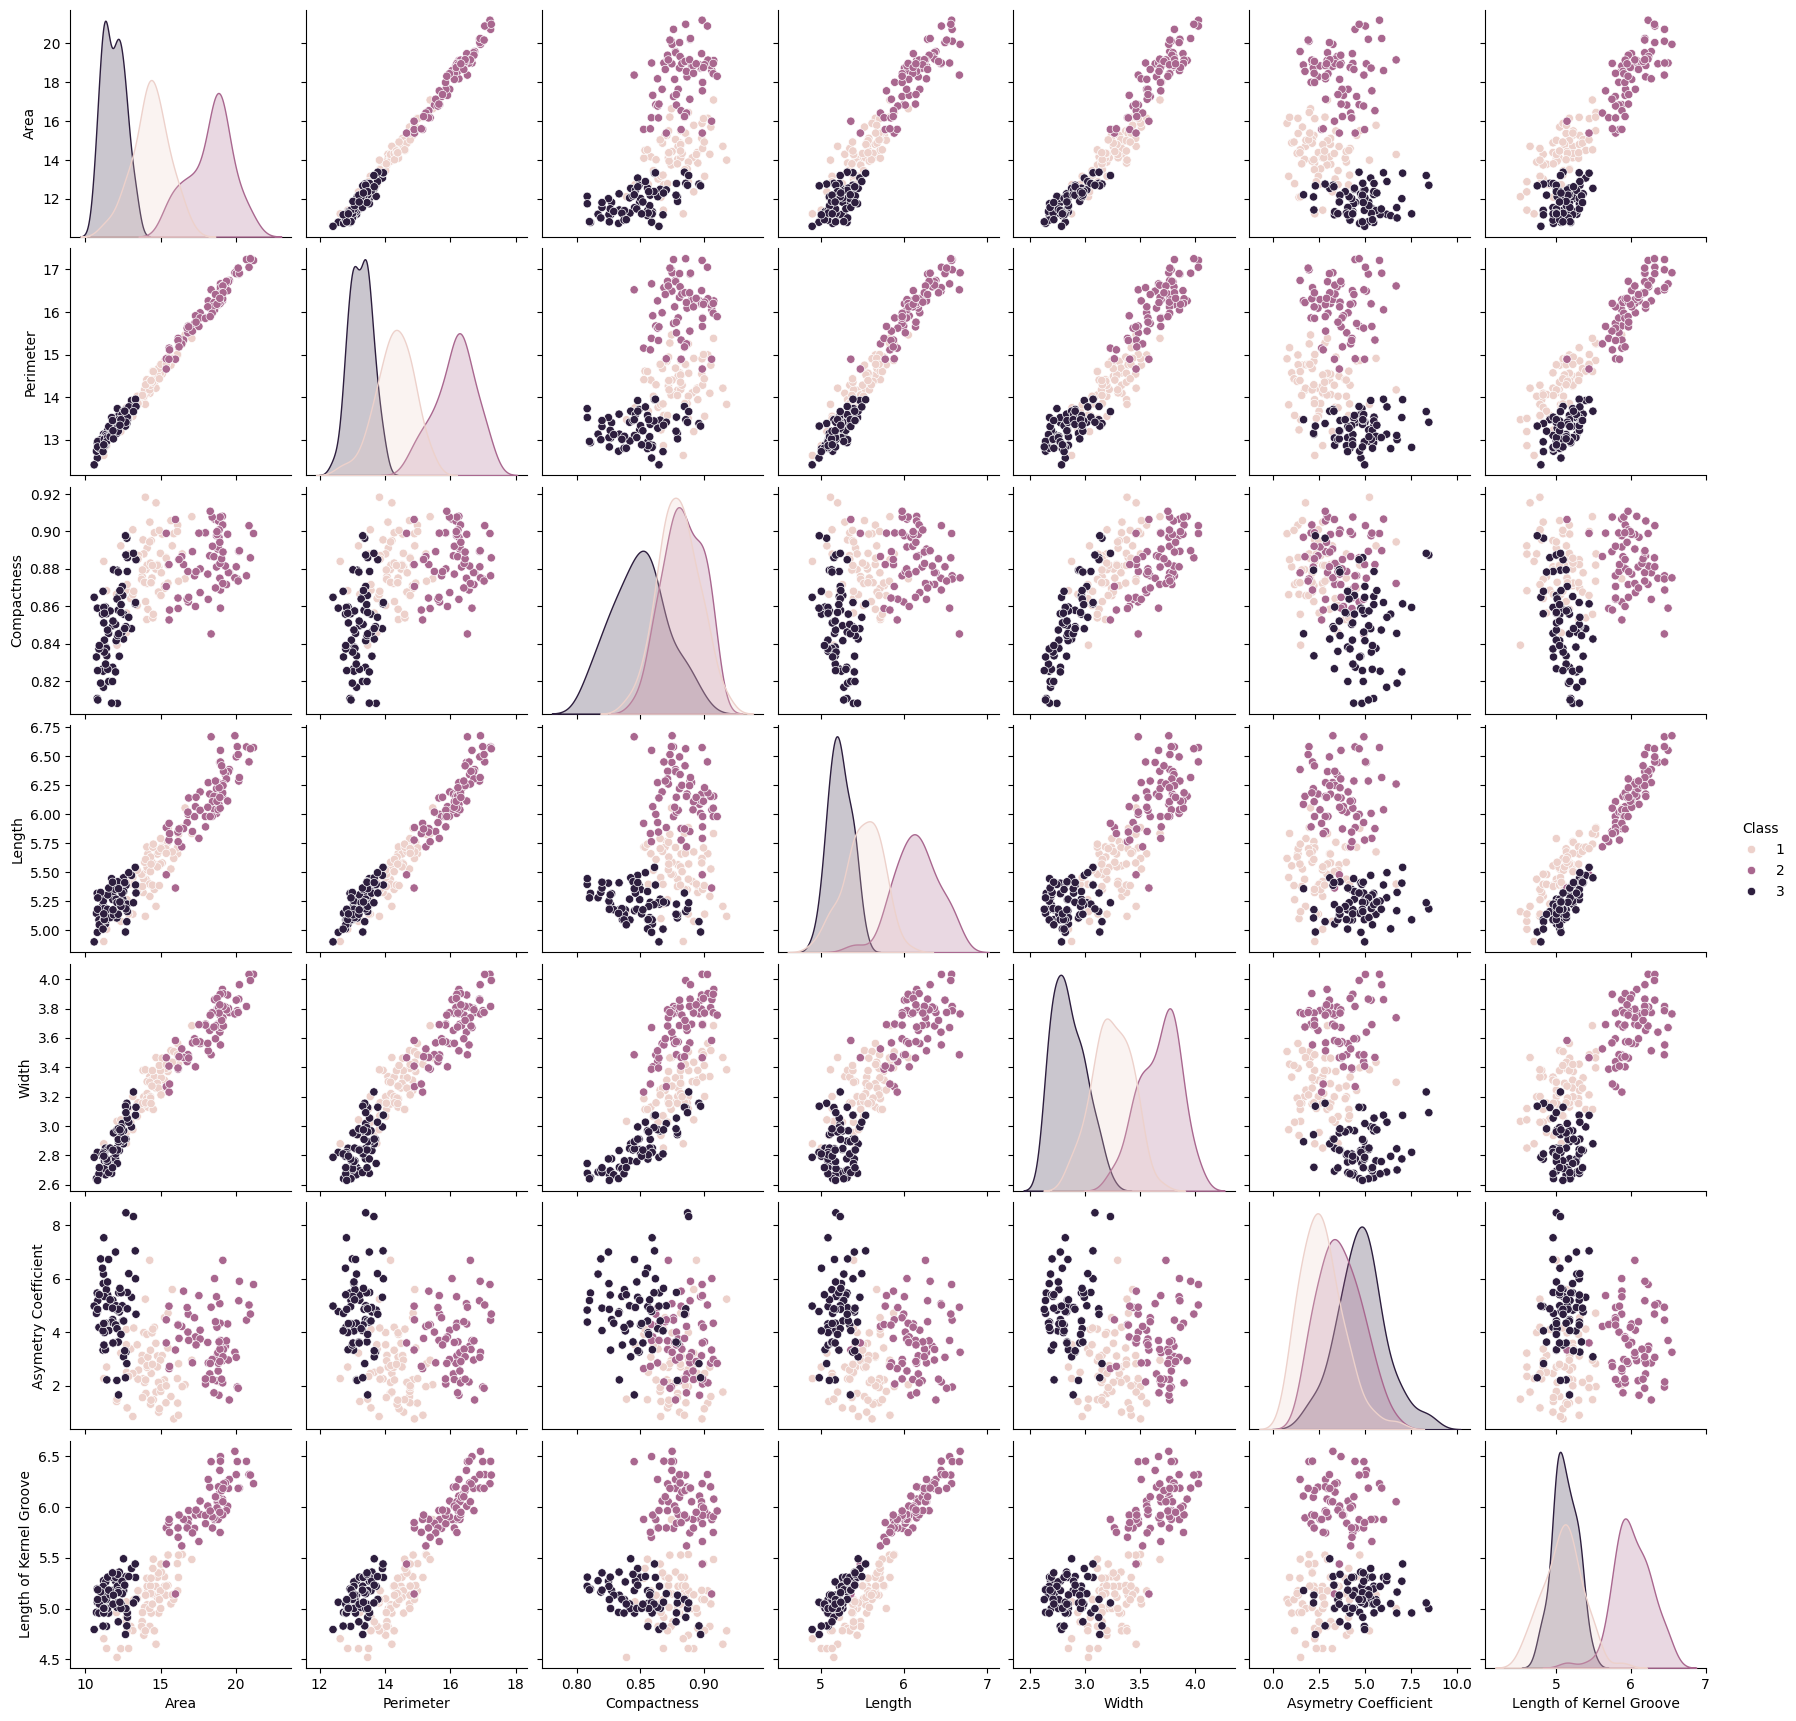

In [3]:
sns.pairplot(df, hue="Class")

# Ground Truth

[Text(0.5, 1.0, 'Ground Truth Groups')]

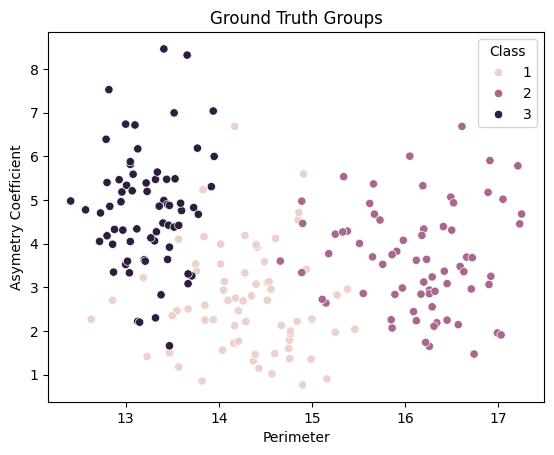

In [4]:
sns.scatterplot(
    x = "Perimeter", 
    y = "Asymetry Coefficient", 
    data = df, 
    hue=df["Class"]).set(title="Ground Truth Groups")

# K-means clustering

K-means tries to group data into n groups of equal variance.

The strengths of K-means include:
- In practice K-means is very fast
- Scales well to large numbers of samples
- Useful across a large range of application areas in many different fields

Limitations include:
- Can get stuck in local minima and can require multiple restarts
- Number of clusters has to be known up front
- The optimization attribute assumes the shape of data points is convex and circular

[Text(0.5, 1.0, 'K-Means Groups')]

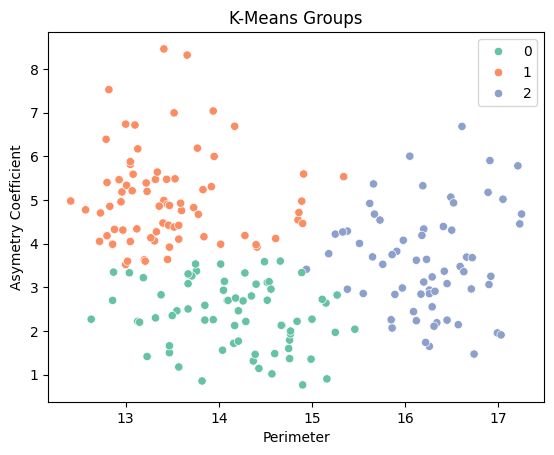

In [5]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(5)

X = df[["Perimeter", "Asymetry Coefficient"]]

clustering = KMeans(n_clusters = 3).fit(X)
labels = clustering.labels_

sns.scatterplot(
    x = "Perimeter", 
    y = "Asymetry Coefficient", 
    data = X, hue=labels.astype(int), palette="Set2").set(title="K-Means Groups")